In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from dqn import DQN, DQNAgent
from replay_buffer import ReplayBuffer
from her import HindsightExperienceReplay
from bit_flip_env import BitFlipEnv

In [3]:
n_bits = 50
env = BitFlipEnv(num_bits=n_bits)
state_dim = env.state_dim
n_actions = env.n_actions
state_dim, n_actions

(50, 50)

In [4]:
agent = DQN(state_dim * 2, n_actions, hidden_size=256)
buffer = ReplayBuffer(size=1_000_000)
her = HindsightExperienceReplay(env, agent, buffer, 
                                batch_size=128,
                                max_steps=n_bits, learning_freq=40)

In [5]:
import copy
agent2 = DQN(state_dim * 2, n_actions, hidden_size=256)

env2 = BitFlipEnv(num_bits=n_bits)
agent2 = copy.deepcopy(agent)
buffer2 = ReplayBuffer(size=100_000)
her2 = HindsightExperienceReplay(env2, agent2, buffer2, 
                                 batch_size=128,
                                max_steps=n_bits, learning_freq=40)

In [6]:
her.play_and_learn()

(-50.0, 0.0)

In [7]:
a = torch.rand((3))
b = torch.rand((3))
a, b, torch.equal(a, b)

(tensor([0.9368, 0.4423, 0.7200]), tensor([0.5516, 0.7547, 0.2508]), False)

In [8]:
a = np.random.rand((3))
b = np.random.rand((3))
a, b, np.equal(a, b)

(array([0.05631324, 0.76560385, 0.48205762]),
 array([0.04735741, 0.46941519, 0.80150413]),
 array([False, False, False]))

In [9]:
epochs = 100
epoch_iters = 50
success_history = []
success_history2 = []

In [10]:
a = torch.ones((4,5))
torch.max(a, -1).values

tensor([1., 1., 1., 1.])

Epoch 73 epsilon = -3.122502256758253e-17 success rate = 0.0
Epoch 73 epsilon = -3.122502256758253e-17 success rate = 0.0


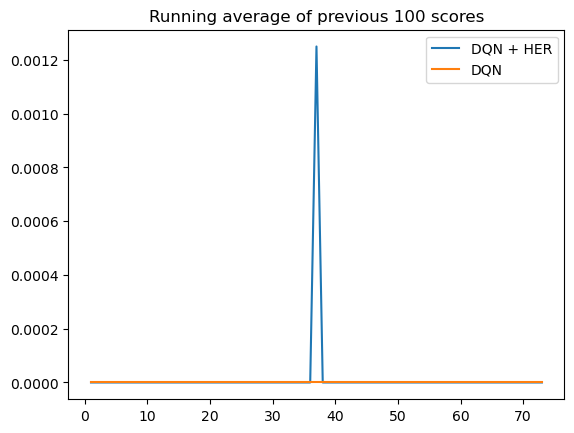

 42%|████▏     | 21/50 [00:16<00:22,  1.30it/s]


KeyboardInterrupt: 

In [11]:
from tqdm import tqdm
import numpy as np
from utils import plot_learning_curve
import matplotlib.pyplot as plt

for epoch in range(epochs):
    score_history = []
    score_history2 = []
    for iter in tqdm(range(epoch_iters)):
        score, success = her.play_and_learn(num_episodes=16)
        score_history.append(float(success))

        score, success = her2.play_and_learn(num_episodes=16, her=False)
        score_history2.append(float(success))

    if agent.epsilon > 0:
        agent.epsilon -= 0.01
        agent2.epsilon -= 0.01

    success_rate = np.mean(score_history)
    success_history.append(success_rate)
    plot_learning_curve(epoch + 1, success_history, name="DQN + HER") 

    success_rate2 = np.mean(score_history2)
    success_history2.append(success_rate2)
    plot_learning_curve(epoch + 1, success_history2, name="DQN") 

    print(f"Epoch {epoch + 1} epsilon = {agent.epsilon} success rate = {success_rate}")
    print(f"Epoch {epoch + 1} epsilon = {agent2.epsilon} success rate = {success_rate2}")
    plt.show()